In [14]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.decomposition import PCA
import seaborn as sns

In [47]:
session = np.load('/data/LLMs/willet/session.npy')
ba44_zscore_smooth = np.load('/data/LLMs/willet/smooth_ba44_pow.npy')
ba6v_zscore_smooth = np.load('/data/LLMs/willet/smooth_ba6v_pow.npy')

In [48]:
def dim_PCA(neural_data):
    explained_var_session = {}
    min_d = {0.7: [], 0.8: [], 0.9: []}
    for s in np.unique(session):
        sess_idxs = np.argwhere(session==s).squeeze()
        ba44_sess = neural_data[sess_idxs]
        pca = PCA(n_components=128)
        _ = pca.fit(ba44_sess)
        explained_var_session[s] = pca.explained_variance_ratio_
        for key in min_d.keys():
            min_d[key].append(int(np.argwhere(np.cumsum(pca.explained_variance_ratio_)>key)[0][0]))

    return explained_var_session, min_d

In [53]:
ba44_exp_var, ba44_min_d = dim_PCA(ba44_zscore_smooth)
ba6v_exp_var, ba6v_min_d = dim_PCA(ba6v_zscore_smooth)

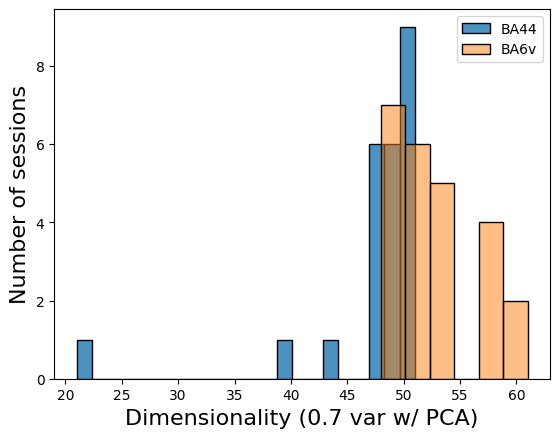

In [75]:
# Plotting the histograms
sns.histplot(ba44_min_d[0.7], label='BA44', alpha=0.8)
sns.histplot(ba6v_min_d[0.7], label='BA6v', alpha=0.5)

# Adding labels to the axes
plt.xlabel("Dimensionality (0.7 var w/ PCA)", fontsize=16)
plt.ylabel("Number of sessions", fontsize=16)

# Display the legend
plt.legend()

plt.savefig('/home2/ebrahim/neural_seq_decoder/figures/dim_70', dpi=300, bbox_inches='tight')
